In [1]:
import experiments_sbm as experiments_sbm

import numpy as np
import igraph as ig
import matplotlib.pyplot as plt

from tqdm import tqdm

In [11]:
n = 80000
n_clusters = 2
alpha = [ 1 / n_clusters for i in range( n_clusters ) ]
block_sizes = [ int( alpha[i] * n ) for i in range( n_clusters ) ]

labels = [ ]
for k in range( n_clusters ):
    labels += [ k for i in range( block_sizes[k] ) ] 

asymptotic_rate = np.sqrt(n)
B = np.array( [ [1,2],[2,4] ] )

lambdain = 1
lambdaout = 1
weights_parameters = (lambdain - lambdaout) * np.eye( n_clusters ) + lambdaout * np.ones( n_clusters )

In [12]:
T = np.multiply( weights_parameters, B) @ np.diag( alpha ) * asymptotic_rate - np.ones( (n_clusters, n_clusters  ))
vals, vecs = np.linalg.eigh(T.T)
rho_theoretic = np.max( vals ) / asymptotic_rate 

pi = vecs[:,1]
pi = pi/np.sum(pi)
c = np.log( np.sum( [ pi[k]**2 / alpha[k] for k in range(n_clusters) ] ) )

In [13]:
c

np.float64(0.10592828722206188)

In [14]:
n_trials = 5

start = np.min( T @ np.ones( n_clusters ) ) / asymptotic_rate 
stop = np.max( T @ np.ones( n_clusters ) ) / asymptotic_rate 
rho_range = np.linspace( start = 1.5, stop = 3, num=30 )

In [16]:
stop

np.float64(2.9929289321881347)

In [7]:
ks_distance_sbm = np.zeros( (n_trials, len(rho_range )) )
for trial in tqdm(range( n_trials )):
    G = ig.Graph.SBM( np.sum(block_sizes), B * asymptotic_rate / n, block_sizes, directed=False, loops=False)
    G = experiments_sbm.add_weights( G, weights_parameters, block_sizes, weight_distribution = 'exponential' )
    ks_distance_sbm[trial,:] = experiments_sbm.testingDistributionalLimit( G, rho_range * asymptotic_rate, n_samples = 100, source_vertices = [i for i in range(n)], target_vertices = [i for i in range(n)] , c =c ) 

ks_distance_sbm_mean = np.mean(ks_distance_sbm, axis=0)
ks_distance_sbm_std = np.std(ks_distance_sbm, axis=0)


100%|██████████| 5/5 [29:41<00:00, 356.28s/it]


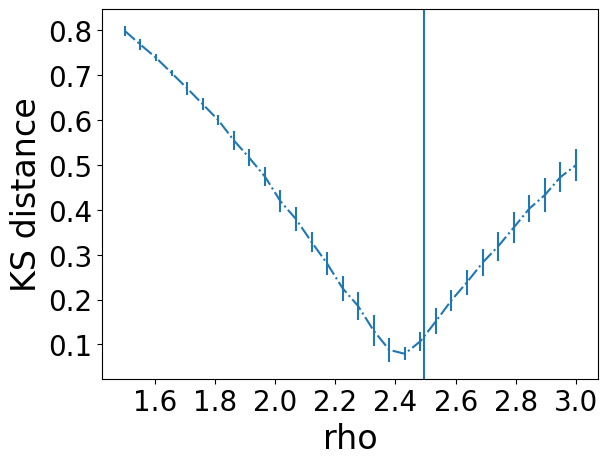

In [8]:
fileName = 'KS_sqrt(n)_n_' + str(n) + '_B_' + str(B) + '_alpha_' + str(alpha) + '_ntrials_' + str(n_trials) + '.pdf'
experiments_sbm.plotFigure( rho_range, ks_distance_sbm_mean, accuracy_err = ks_distance_sbm_std, methods = None, 
           vertical_line = rho_theoretic,
              xticks = None, yticks = None,
              xlabel = "rho", ylabel = "KS distance",
              savefig = True, fileName = fileName )

In [9]:
ks_distance_sbm = dict()
ks_distance_sbm['00'] = np.zeros( (n_trials, len(rho_range )) )
ks_distance_sbm['01'] = np.zeros( (n_trials, len(rho_range )) )
ks_distance_sbm['11'] = np.zeros( (n_trials, len(rho_range )) )

for trial in tqdm(range( n_trials )):
    G = ig.Graph.SBM( np.sum(block_sizes), B * asymptotic_rate / n, block_sizes, directed=False, loops=False)
    G = experiments_sbm.add_weights( G, weights_parameters, block_sizes, weight_distribution = 'exponential' )
    ks_distance_sbm['00'][trial,:] = experiments_sbm.testingDistributionalLimit( G, rho_range * asymptotic_rate, n_samples = 50, source_vertices = [i for i in range(n) if labels[i]==0], target_vertices = [i for i in range(n) if labels[i]==0 ], c=c )
    ks_distance_sbm['01'][trial,:] = experiments_sbm.testingDistributionalLimit( G, rho_range * asymptotic_rate, n_samples = 50, source_vertices = [i for i in range(n) if labels[i]==0], target_vertices = [i for i in range(n) if labels[i]==1], c=c )
    ks_distance_sbm['11'][trial,:] = experiments_sbm.testingDistributionalLimit( G, rho_range * asymptotic_rate, n_samples = 50, source_vertices = [i for i in range(n) if labels[i]==1], target_vertices = [i for i in range(n) if labels[i]==1], c=c )

ks_distance_sbm_mean = dict( )
ks_distance_sbm_std = dict( )
for key in ks_distance_sbm.keys( ):
    ks_distance_sbm_mean[key] = np.mean(ks_distance_sbm[key], axis=0)
    ks_distance_sbm_std[key] = np.std(ks_distance_sbm[key], axis=0)

100%|██████████| 5/5 [37:30<00:00, 450.02s/it]


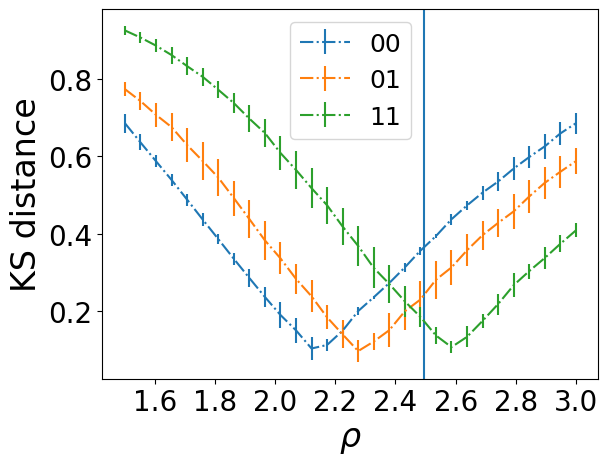

In [10]:
fileName = 'KS_sqrt(n)_per_community_n_' + str(n) + '_B_' + str(B) + '_alpha_' + str(alpha) + '_ntrials_' + str(n_trials) + '.pdf'
experiments_sbm.plotFigure( rho_range, ks_distance_sbm_mean, accuracy_err = ks_distance_sbm_std, methods = ks_distance_sbm_mean.keys( ), 
           vertical_line = rho_theoretic,
              xticks = None, yticks = None,
              xlabel = r"$ \rho $", ylabel = "KS distance",
              savefig = True, fileName = fileName )

In [ ]:
mean_limit_sbm = np.zeros( (n_trials, len(rho_range )) )

for trial in tqdm(range( n_trials )):
    G = ig.Graph.SBM( np.sum(block_sizes), B * asymptotic_rate / n, block_sizes, directed=False, loops=False)
    G = experiments_sbm.add_weights( G, weights_parameters, block_sizes, weight_distribution = 'exponential' )
    mean_limit_sbm[trial,:] = experiments_sbm.testingLimit( G, rho_range * asymptotic_rate / np.log(n), n_samples = 100, source_vertices = [i for i in range(n)], target_vertices = [i for i in range(n)] ) 

mean_limit_sbm_mean = np.mean(mean_limit_sbm, axis=0)
mean_limit_sbm_std = np.std(mean_limit_sbm, axis=0)

In [ ]:
fileName = 'finding_rho_SBM_log(n)_n_' + str(n) + '_B_' + str(B) + '_alpha_' + str(alpha) + '_ntrials_' + str(n_trials) + '.pdf'
experiments_sbm.plotFigure( rho_range, np.abs( mean_limit_sbm_mean ), accuracy_err = mean_limit_sbm_std, methods = None, 
           vertical_line = rho_theoretic,
              xticks = None, yticks = None,
              xlabel = "rho", ylabel = "Empirical average",
              savefig = True, fileName = fileName )


In [19]:
mean_limit = dict()
mean_limit['00'] = np.zeros( (n_trials, len(rho_range )) )
mean_limit['01'] = np.zeros( (n_trials, len(rho_range )) )
mean_limit['11'] = np.zeros( (n_trials, len(rho_range )) )

for trial in tqdm(range( n_trials )):
    G = ig.Graph.SBM( np.sum(block_sizes), B * asymptotic_rate / n, block_sizes, directed=False, loops=False)
    G = experiments_sbm.add_weights( G, weights_parameters, block_sizes, weight_distribution = 'exponential' )
    mean_limit['00'][trial,:] = experiments_sbm.testingLimit( G, rho_range * asymptotic_rate / np.log(n), n_samples = 50, source_vertices = [i for i in range(n) if labels[i]==0], target_vertices = [i for i in range(n) if labels[i]==0 ] )
    mean_limit['01'][trial,:] = experiments_sbm.testingLimit( G, rho_range * asymptotic_rate / np.log(n), n_samples = 50, source_vertices = [i for i in range(n) if labels[i]==0], target_vertices = [i for i in range(n) if labels[i]==1] )
    mean_limit['11'][trial,:] = experiments_sbm.testingLimit( G, rho_range * asymptotic_rate / np.log(n), n_samples = 50, source_vertices = [i for i in range(n) if labels[i]==1], target_vertices = [i for i in range(n) if labels[i]==1] )

mean_limit_mean = dict( )
mean_limit_std = dict( )
for key in ks_distance_sbm.keys( ):
    mean_limit_mean[key] = np.abs( np.mean(mean_limit[key], axis=0) )
    mean_limit_std[key] = np.std(mean_limit[key], axis=0)

100%|██████████| 5/5 [12:51<00:00, 154.34s/it]


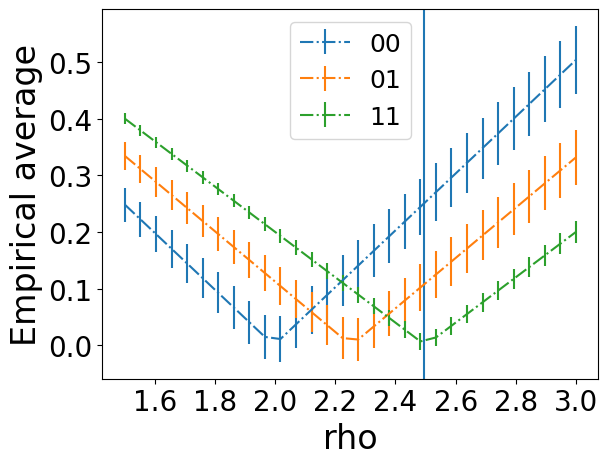

In [21]:
fileName = 'finding_rho_percommunity_log(n)_n_' + str(n) + '_B_' + str(B) + '_alpha_' + str(alpha) + '_ntrials_' + str(n_trials) + '.pdf'
experiments_sbm.plotFigure( rho_range, mean_limit_mean , accuracy_err = mean_limit_std, methods = mean_limit_mean.keys( ), 
           vertical_line = rho_theoretic,
              xticks = None, yticks = None,
              xlabel = "rho", ylabel = "Empirical average",
              savefig = True, fileName = fileName )
